**このコードでは、create_csv_1.ipynbで作成した2019年1月1日~2023年11月3日までのcsvファイルから、指定した国と都市、使用する目的変数と説明変数に絞りつつAQI値を算出したcsvを作成し、作成したcsvのAQI値を時系列のグラフとして表示するまでの一連の流れを行う**

前提として、

*  Data_preprocessing_1.ipynbにて結合したデータのcsvとAQIフォルダーにAQI_model_dataframe.pyが存在していること

が条件となる。

**注意事項**

※ 作成者はGoogle drive内で作業をしていると同時に、ゼミというフォルダーの中の公開ソースというフォルダーで作業していることからpathの変更は必要不可欠である

In [ ]:
#Google driveに接続
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install japanize-matplotlib
import pandas as pd
import os
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

#作成したpyファイルを読み込むために必要なコード
import sys
sys.path.append("/content/drive/MyDrive/ゼミ/公開ソース/AQI")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=30eeb6f90160b765d1073bbe9b7d3a248276ccc0854b2f3041cc15f896069d7e
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
#　※自分で作成したフォルダパスが異なる場合こちらを変更してください。※※
working_dir = '/content/drive/MyDrive/ゼミ/公開ソース'
path = f'{working_dir}/data/combined_data'
os.listdir(path)

['all_data.csv']

In [ ]:
df = pd.read_csv(f'{path}/all_data.csv')
df

,Date,Country,City,Specie,median,Year
0,2019-01-01,PT,Funchal,pm25,51.0,2019
1,2019-01-01,GB,Manchester,pm10,15.0,2019
2,2019-01-01,TR,Konya,temperature,-2.0,2019
3,2019-01-01,CA,Québec,humidity,80.0,2019
4,2019-01-01,IT,Florence,so2,0.1,2019
...,...,...,...,...,...,...
10275324,2023-11-03,CN,Shiyan,wind-gust,2.1,2023
10275325,2023-11-03,NO,Bergen,no2,1.5,2023
10275326,2023-11-03,RO,Galaţi,pm10,18.0,2023
10275327,2023-11-03,IR,Kerman,so2,18.0,2023


In [ ]:
#国と都市を指定し、抽出したい値と大気汚染の空気質指数を算出する関数
#作成したAQI値算出モジュールを読み込む
import AQI_model_dataframe

def create_city_aqi(Country,City,Specie_lists):
  #条件で絞っていく
  df_country = df[df["Country"].isin([Country])]
  df_city = df_country[df_country["City"].isin([City])]
  df_elements = df_city[df_city["Specie"].isin(Specie_lists)]

  #Specie列の値でカラムを作成する
  df_specie = df_elements.pivot_table(index="Date",columns="Specie",values="median",aggfunc='first')

  #AQI値を算出するために、AQI_model_dataframe関数を使用する
  df_aqi = pd.DataFrame(AQI_model_dataframe.AQI_model_dataframe(df_specie))

  #データを保存
  path_csv = f'{working_dir}/data/city_aqi_data'
  df_aqi.to_csv(f'{path_csv}/{City}_AQI.csv')

  return df_aqi

In [ ]:
#インドのデリーを指定
delhi_elements = ["co","pm25","pm10","so2","no2","o3","humidity","pressure","temperature","precipitation"]
create_city_aqi("IN","Delhi",delhi_elements)

/content/drive/MyDrive/ゼミ/公開ソース/AQI/AQI_model_dataframe.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x] * 0.001
/content/drive/MyDrive/ゼミ/公開ソース/AQI/AQI_model_dataframe.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["co"] = df["co"] * 0.1
/content/drive/MyDrive/ゼミ/公開ソース/AQI/AQI_model_dataframe.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Specie,humidity,precipitation,pressure,temperature,co,so2,pm25,pm10,o3,no2,aqi_co,aqi_so2,aqi_pm25,aqi_pm10,aqi_o3_1,aqi_no2,AQI_total
Date,,,,,,,,,,,,,,,,,
2019-01-01,71.9,1.0,996.1,13.0,1.76,0.0093,341.0,354.0,0.0041,0.0290,20,14,391,200,0,0,391
2019-01-02,75.7,405.3,996.5,13.8,1.99,0.0087,383.0,405.0,0.0045,0.0319,23,13,422,273,0,0,422
2019-01-03,79.0,0.5,997.5,13.0,1.85,0.0071,410.0,421.0,0.0043,0.0288,21,10,440,296,0,0,440
2019-01-04,81.7,34.4,996.5,12.3,1.50,0.0065,289.0,220.0,0.0038,0.0236,17,10,339,133,0,0,339
2019-01-05,70.3,44.7,994.3,13.9,1.56,0.0076,304.0,266.0,0.0053,0.0253,18,11,354,156,0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,58.7,NaN,989.2,26.2,1.41,0.0038,200.0,186.0,0.0098,0.0171,16,6,250,116,0,0,250
2023-10-31,65.0,1.5,989.1,26.2,1.48,0.0038,233.0,204.0,0.0090,0.0170,17,6,283,125,0,0,283
2023-11-01,64.3,NaN,990.4,25.5,1.29,0.0041,206.0,179.0,0.0080,0.0160,15,6,256,113,0,0,256


In [ ]:
#日本の東京を指定
tokyo_elements = ["co","pm25","pm10","so2","no2","o3","humidity","pressure","temperature","precipitation","wind-speed"]
create_city_aqi("JP","Tokyo",tokyo_elements)

/content/drive/MyDrive/ゼミ/公開ソース/AQI/AQI_model_dataframe.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x] * 0.001
/content/drive/MyDrive/ゼミ/公開ソース/AQI/AQI_model_dataframe.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["co"] = df["co"] * 0.1
/content/drive/MyDrive/ゼミ/公開ソース/AQI/AQI_model_dataframe.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Specie,humidity,precipitation,pressure,temperature,wind-speed,co,so2,pm25,pm10,o3,no2,aqi_co,aqi_so2,aqi_pm25,aqi_pm10,aqi_o3_1,aqi_no2,AQI_total
Date,,,,,,,,,,,,,,,,,,
2019-01-01,16.0,NaN,1021.0,2.5,0.5,0.34,0.0015,38.0,10.0,0.0168,0.0139,4,2,95,9,0,0,95
2019-01-02,16.0,NaN,1018.0,3.3,0.6,0.34,0.0015,17.0,5.0,0.0241,0.0084,4,2,54,5,0,0,54
2019-01-03,16.0,NaN,1021.0,2.5,0.7,0.23,0.0015,17.0,5.0,0.0248,0.0084,3,2,54,5,0,0,54
2019-01-04,16.0,NaN,1022.0,2.2,0.2,0.45,0.0029,34.0,9.0,0.0184,0.0176,5,4,87,8,0,0,87
2019-01-05,16.0,NaN,1012.5,3.0,0.5,0.45,0.0015,50.0,11.0,0.0160,0.0213,5,2,120,10,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,57.0,NaN,1019.0,18.0,1.1,0.34,0.0015,25.0,8.0,0.0224,0.0121,4,2,70,7,0,0,70
2023-10-31,66.0,99.0,1021.5,18.3,0.8,0.45,0.0029,42.0,13.0,0.0160,0.0195,5,4,104,12,0,0,104
2023-11-01,70.0,NaN,1018.0,19.0,1.1,0.45,0.0029,53.0,16.0,0.0248,0.0167,5,4,126,15,0,0,126


In [ ]:
#作成したcsvファイルを読み込み
path_csv = f'{working_dir}/data/city_aqi_data'

#各都市ごとにcsvファイルとして保存
Tokyo = pd.read_csv(f'{path_csv}/Tokyo_AQI.csv',index_col="Date",parse_dates=True)
Delhi = pd.read_csv(f'{path_csv}/Delhi_AQI.csv',index_col="Date",parse_dates=True)

In [ ]:
#読み込んだデータフレームの確認
Tokyo

,humidity,precipitation,pressure,temperature,wind-speed,co,so2,pm25,pm10,o3,no2,aqi_co,aqi_so2,aqi_pm25,aqi_pm10,aqi_o3_1,aqi_no2,AQI_total
Date,,,,,,,,,,,,,,,,,,
2019-01-01,16.0,NaN,1021.0,2.5,0.5,0.34,0.0015,38.0,10.0,0.0168,0.0139,4,2,95,9,0,0,95
2019-01-02,16.0,NaN,1018.0,3.3,0.6,0.34,0.0015,17.0,5.0,0.0241,0.0084,4,2,54,5,0,0,54
2019-01-03,16.0,NaN,1021.0,2.5,0.7,0.23,0.0015,17.0,5.0,0.0248,0.0084,3,2,54,5,0,0,54
2019-01-04,16.0,NaN,1022.0,2.2,0.2,0.45,0.0029,34.0,9.0,0.0184,0.0176,5,4,87,8,0,0,87
2019-01-05,16.0,NaN,1012.5,3.0,0.5,0.45,0.0015,50.0,11.0,0.0160,0.0213,5,2,120,10,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,57.0,NaN,1019.0,18.0,1.1,0.34,0.0015,25.0,8.0,0.0224,0.0121,4,2,70,7,0,0,70
2023-10-31,66.0,99.0,1021.5,18.3,0.8,0.45,0.0029,42.0,13.0,0.0160,0.0195,5,4,104,12,0,0,104
2023-11-01,70.0,NaN,1018.0,19.0,1.1,0.45,0.0029,53.0,16.0,0.0248,0.0167,5,4,126,15,0,0,126


In [ ]:
#graphを保存する場所を指定
path_graph = f"{working_dir}/result/graph/AQI"

In [ ]:
#AQI値の時系列グラフを作成する関数
#※TokyoとDelhiでAQI値に大幅な差があるため、背景の色をそれぞれ分けている。

def graph_aqi(dataframe,city_name):
  rcParams['figure.figsize'] = 15, 6
  plt.title(f'{city_name}(2019/1/1~2023/11/03)AQI_value')
  y = dataframe["AQI_total"]
  plt.plot(y, color="black",label=f"AQI_total_{city_name}")

  if city_name == "Tokyo":
    plt.axhspan(0, 50, color='green')
    plt.axhspan(51, 100, color='yellow')
    plt.axhspan(101, 150, color='orange')
    plt.axhspan(151, 200, color='red')
  elif city_name == "Delhi":
    plt.axhspan(51, 100, color='yellow')
    plt.axhspan(101, 150, color='orange')
    plt.axhspan(151, 200, color='red')
    plt.axhspan(201, 300, color="#d62728")
    plt.axhspan(301, 500, color="#800000")
    plt.axhspan(401, 500, color="#800000")

  plt.ylabel('AQI')
  plt.xlabel('Date')
  plt.legend()
  plt.savefig(f'{path_graph}/{city_name}_AQI_data.png')
  plt.show()




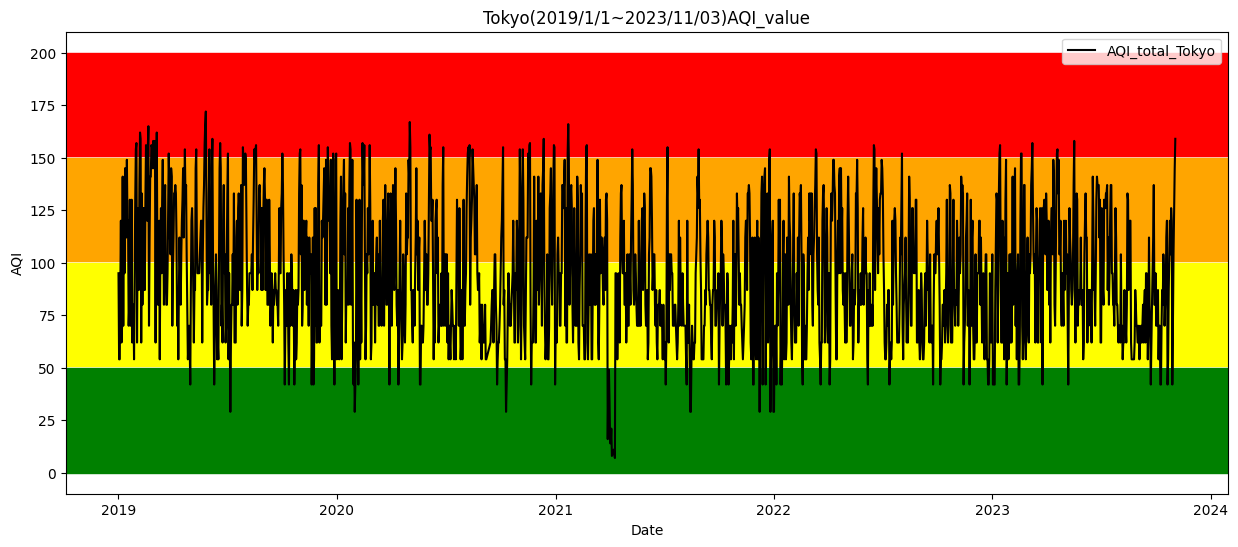

In [ ]:
graph_aqi(Tokyo,"Tokyo")

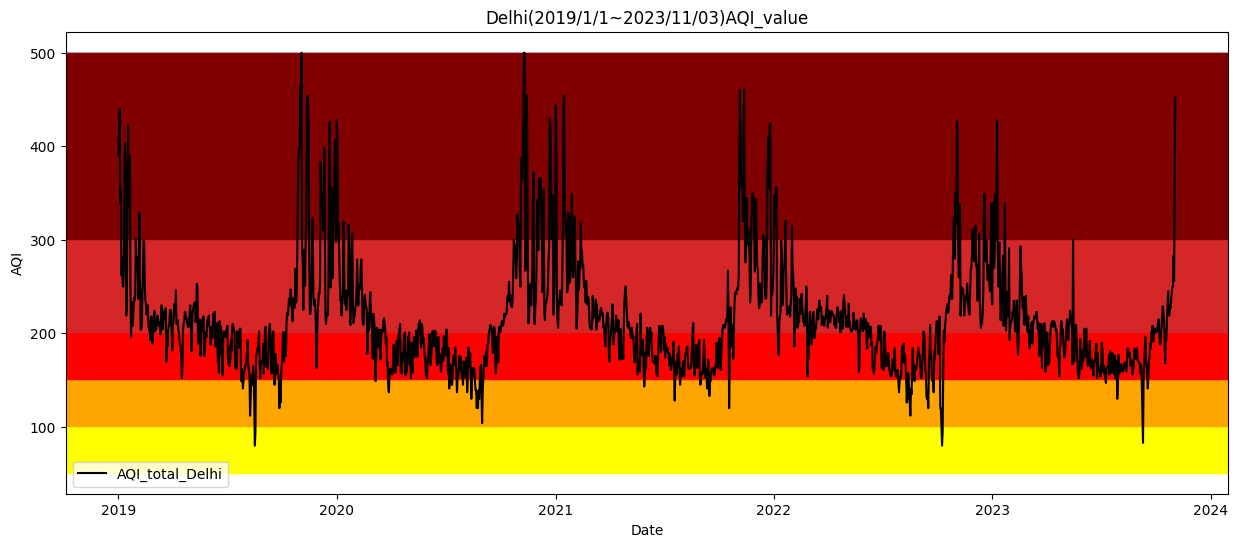

In [ ]:
graph_aqi(Delhi,"Delhi")